In [ ]:
#!pip install freud-analysis

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import freud # для создания диаграммы Вороного
import networkx as nx # для создания матрицы смежности

from points_gen import *

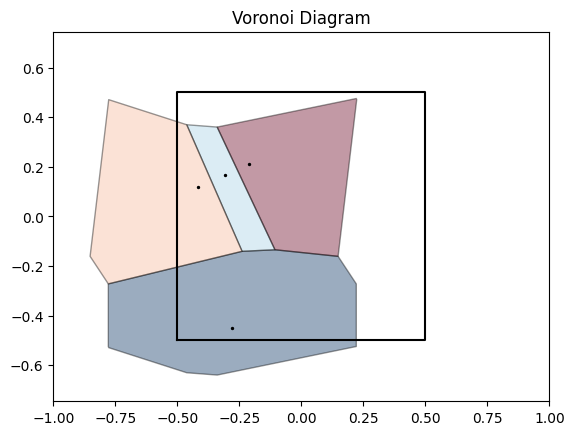

In [2]:
# Compute the Voronoi diagram
N = 4

box, points = generate_points(N)
voro = freud.locality.Voronoi()
voro.compute((box, points))

# Plot Voronoi with points and a custom cmap
plt.figure()
ax = plt.gca()
voro.plot(ax=ax, cmap="RdBu")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.scatter(points[:, 0], points[:, 1], s=2, c="k")
plt.show()

In [3]:
cells = voro.compute((box, points)).polytopes

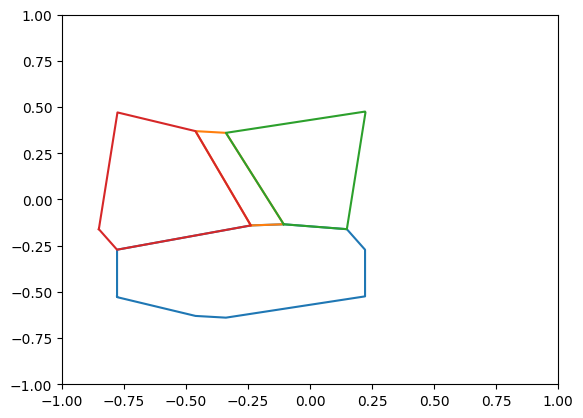

In [4]:
#бесполезный кусок кода, можно выкинуть

plt.xlim(-1, 1)
plt.ylim(-1, 1)
for i in range(N):
    x_data = cells[i].T[0]
    x_data = np.concatenate([x_data, [x_data[0]]])
    y_data = cells[i].T[1]
    y_data = np.concatenate([y_data, [y_data[0]]])
    plt.plot(x_data, y_data)

In [5]:
vertices = get_vertices(cells)
transformed_cells = transform(cells)

edgelist = get_edges(vertices, transformed_cells)

In [6]:
G = nx.Graph(edgelist)
A = nx.adjacency_matrix(G)

In [7]:
A.toarray()

array([[0, 1, 0, 1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 1, 0, 1, 0, 1, 0]], dtype=int32)

In [8]:
temp = A.toarray().sum(axis = 0) # можно проверить что граф 3-регулярный
temp

array([3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [9]:
np.all(temp == 3)

True

In [10]:
voronoi_adjacency_matrix(3)

array([[0, 1, 0, 0, 1, 1],
       [1, 0, 1, 0, 0, 1],
       [0, 1, 0, 1, 1, 0],
       [0, 0, 1, 0, 1, 1],
       [1, 0, 1, 1, 0, 0],
       [1, 1, 0, 1, 0, 0]], dtype=int32)